In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
pd.set_option('display.max_columns', None)


In [173]:
crime_df_1 = pd.read_csv('Crime_Data_from_2010_to_2019_20251031.csv')
crime_df_2 = pd.read_csv('Crime_Data_from_2020_to_Present_20251031.csv')


In [174]:
crime_df_1.rename(columns={'AREA ': 'AREA'}, inplace=True)
data_df = pd.concat([crime_df_1, crime_df_2], ignore_index=True)
print(data_df.shape)

(3138128, 28)


In [35]:
test = data_df['LOCATION'].value_counts()
print(test)

LOCATION
6TH                          ST            6352
9300    TAMPA                        AV    5414
7TH                          ST            5289
6TH                                        4612
7TH                                        4416
                                           ... 
1500 S  ARLINGTON                    BL       1
CLELAND                      AV               1
1600 W  61ST                         ST       1
400 N  JEFFERSON                    BL        1
9500    LA CIENEGA                   BL       1
Name: count, Length: 84137, dtype: int64


In [39]:
# 1. Overview
col = 'LOCATION'
s = data_df[col]
print("dtype:", s.dtype)
print("total rows:", len(s))
print("nulls (.isnull()):", s.isnull().sum())
print("unique (non-null):", s.nunique(dropna=True))
# show top values including NaN
print("\nTop 50 values (including NaN):")
print(s.value_counts(dropna=False).head(50))

dtype: object
total rows: 3138128
nulls (.isnull()): 0
unique (non-null): 84137

Top 50 values (including NaN):
LOCATION
6TH                          ST             6352
9300    TAMPA                        AV     5414
7TH                          ST             5289
6TH                                         4612
7TH                                         4416
6600    TOPANGA CANYON               BL     4329
VERMONT                      AV             3990
800 N  ALAMEDA                      ST      3907
5TH                          ST             3880
BROADWAY                                    3860
5TH                                         3859
WESTERN                      AV             3725
10200    SANTA MONICA                 BL    3563
3RD                          ST             3467
8TH                          ST             3377
100    THE GROVE                    DR      3333
6800    HOLLYWOOD                    BL     3252
700 S  FIGUEROA                     ST      31

In [40]:
# 2. Empty or whitespace-only
empty_mask = s.isnull() | s.astype(str).str.strip().eq('')
print("rows that are null OR only whitespace:", empty_mask.sum())
# show examples (up to 10)
print(data_df.loc[empty_mask, :].head(10))

rows that are null OR only whitespace: 0
Empty DataFrame
Columns: [DR_NO, Date Rptd, DATE OCC, TIME OCC, AREA, AREA NAME, Rpt Dist No, Part 1-2, Crm Cd, Crm Cd Desc, Mocodes, Vict Age, Vict Sex, Vict Descent, Premis Cd, Premis Desc, Weapon Used Cd, Weapon Desc, Status, Status Desc, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, LOCATION, Cross Street, LAT, LON]
Index: []

[0 rows x 28 columns]


In [41]:
# 3. Common placeholders (case-insensitive)
placeholders = {'N/A','NA','UNKNOWN','UNK','NONE','NOT AVAILABLE','NOT APPLICABLE','--','-','?','[]','()','TBD','NULL','MISSING'}
# compute normalized (uppercase, stripped) value counts
vals = s.dropna().astype(str).str.strip()
norm = vals.str.upper()
placeholder_counts = norm[norm.isin(placeholders)].value_counts()
print("Detected known placeholder tokens (normalized):")
print(placeholder_counts)

# show example rows for each detected placeholder token
for token in placeholder_counts.index:
    print("\nExamples for token:", token)
    display(data_df.loc[norm.eq(token)].head(5))

Detected known placeholder tokens (normalized):
LOCATION
UNKNOWN    95
UNK         7
Name: count, dtype: int64

Examples for token: UNKNOWN


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
64140,101714702,2010 Jul 15 12:00:00 AM,2010 Jul 14 12:00:00 AM,1330,17,Devonshire,1767,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,IC,Invest Cont,626.0,NaN,NaN,NaN,UNKNOWN,UNKNOWN,34.2442,-118.5362
143800,100709697,2010 May 10 12:00:00 AM,2010 May 10 12:00:00 AM,100,7,Wilshire,765,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,998.0,NaN,NaN,UNKNOWN,UNKNOWN,34.0496,-118.3425
189444,100706649,2010 Mar 01 12:00:00 AM,2010 Feb 27 12:00:00 AM,2300,7,Wilshire,782,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,NaN,NaN,NaN,UNKNOWN,UNKNOWN,34.0387,-118.3717
209123,100627655,2010 Nov 15 12:00:00 AM,2010 Oct 10 12:00:00 AM,900,6,Hollywood,666,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,UNKNOWN,STREET,34.0944,-118.3277
214817,110716080,2011 Oct 10 12:00:00 AM,2011 Oct 08 12:00:00 AM,1,7,Wilshire,765,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,NaN,NaN,NaN,UNKNOWN,UNKNOWN,34.0496,-118.3425



Examples for token: UNK


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1157880,162110661,2016 May 25 12:00:00 AM,2016 May 21 12:00:00 AM,200,21,Topanga,2105,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",...,AO,Adult Other,810.0,NaN,NaN,NaN,UNK,CANOGA PARK,34.2239,-118.6017
1243704,161117194,2016 Sep 16 12:00:00 AM,2016 Sep 16 12:00:00 AM,200,11,Northeast,1184,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,UNK,UNK,34.0812,-118.2520
1334999,160518611,2016 Nov 11 12:00:00 AM,2016 Nov 11 12:00:00 AM,710,5,Harbor,566,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,UNK,UNK,33.7347,-118.2842
1383352,162110661,2016 May 25 12:00:00 AM,2016 May 21 12:00:00 AM,200,21,Topanga,2105,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",...,AO,Adult Other,810.0,NaN,NaN,NaN,UNK,CANOGA PARK,34.2239,-118.6017
1682676,170509996,2017 May 09 12:00:00 AM,2017 Feb 01 12:00:00 AM,1,5,Harbor,517,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,NaN,NaN,NaN,UNK,WILMINGTON,33.7873,-118.2582


In [179]:
data_df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010 Feb 20 12:00:00 AM,2010 Feb 20 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010 Sep 13 12:00:00 AM,2010 Sep 12 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,2010 Aug 09 12:00:00 AM,2010 Aug 09 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,2010 Jan 05 12:00:00 AM,2010 Jan 05 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,2010 Jan 03 12:00:00 AM,2010 Jan 02 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [44]:
data_df['Crm Cd'].value_counts()

Crm Cd
510    276072
624    265959
330    226763
310    206390
440    204127
        ...  
904         5
472         4
926         4
453         2
905         1
Name: count, Length: 143, dtype: int64

In [61]:
data_df['LOCATION'].mask(data_df['LOCATION'].str.match(r"^7TH.*"), '7TH', inplace=True)

In [63]:
data_df[data_df['LOCATION'].str.match(r"^7TH.*")].shape

(9926, 28)

In [ ]:
#Good rule - keep
data_df['LOCATION'] = data_df['LOCATION'].str.replace(r'^00 ', '', regex=True)

In [184]:
print(list(data_df['Vict Age'].value_counts().index))

[0, 28, 30, 29, 27, 25, 26, 24, 31, 35, 23, 32, 33, 34, 22, 36, 37, 21, 38, 40, 39, 41, 42, 20, 43, 44, 45, 50, 46, 47, 48, 49, 51, 19, 52, 53, 54, 55, 56, 57, 18, 58, 59, 60, 61, 62, 17, 63, 16, 64, 15, 65, 66, 14, 67, 68, 13, 69, 70, 71, 12, 72, 73, 74, 11, 75, 76, 77, 10, 78, 79, 9, 80, 8, 81, 7, 6, 5, 82, 83, 4, 3, 84, 85, 86, 2, 87, 88, 89, 99, 90, 91, 92, 93, 94, -1, 95, 96, 97, 98, -2, -3, -4, -5, -6, -7, -9, -8, -10, -12, -11, -13, 114, 118, 120]


In [181]:
data_df[data_df['Vict Age']==0]['Crm Cd Desc'].value_counts().head(25)

Crm Cd Desc
VEHICLE - STOLEN                                            275292
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              58652
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     45890
BURGLARY                                                     38536
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      32281
THEFT PLAIN - PETTY ($950 & UNDER)                           25709
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     16949
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     15990
ROBBERY                                                      15881
TRESPASSING                                                  15755
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                    9830
OTHER MISCELLANEOUS CRIME                                     8867
SHOPLIFTING-GRAND THEFT ($950.01 & OVER)                      6196
BATTERY POLICE (SIMPLE)                                       4989
BURGLARY FROM VEHICLE                             

In [186]:
data_df[data_df['Vict Age']<0]['Crm Cd Desc'].shape

(861,)

In [80]:


df = pd.DataFrame({
    'text_col': ['apple pie', 'banana bread', 'cherry tart'],
    'num_col': [1, 2, 3]
})

# Replace all occurrences of 'a' followed by any character and 'e' with 'X' in 'text_col'
df_replaced = df.replace(to_replace=r'p.e', value='pie', regex=True)
print(df_replaced)

       text_col  num_col
0     appie pie        1
1  banana bread        2
2   cherry tart        3


In [135]:
cCodeSeries = data_df['Crm Cd Desc'].value_counts()
crimeCodes = cCodeSeries.index.astype("string").tolist()
crimeCodeCounts = cCodeSeries.values.tolist()

Saved plot to top10_crime_codes.png


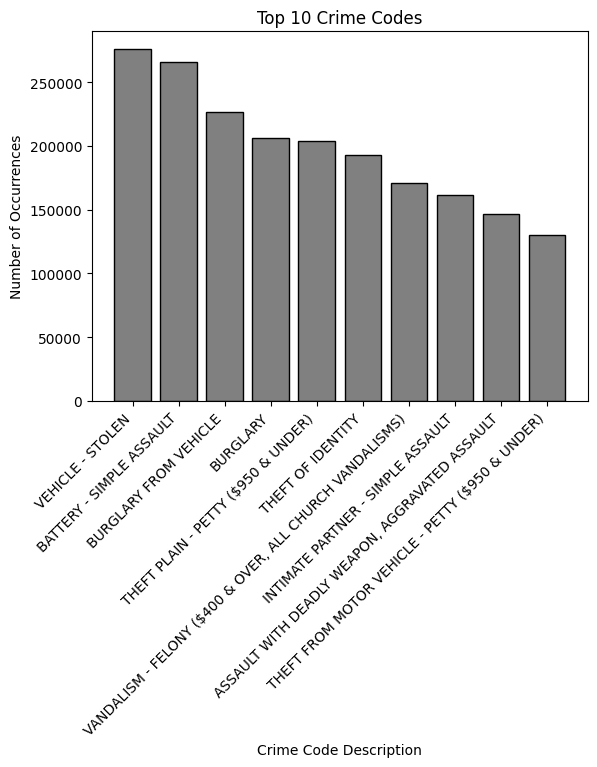

In [187]:
plt.bar(crimeCodes[:10], crimeCodeCounts[:10], width=0.8, color='gray', edgecolor='black')
plt.title("Top 10 Crime Codes")
plt.xlabel("Crime Code Description")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45, ha='right')

filename = "top10_crime_codes.png"

plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Saved plot to {filename}")


In [161]:
s = data_df['DR_NO'].value_counts()

In [162]:
s = list(s[s>=2].index)

In [167]:
duplicate_indices = []
for i in s:
    duplicate_indices.append(list(data_df[data_df['DR_NO']==i].index))

In [ ]:
for indices in duplicate_indices:
    data_df = data_df.drop(indices[0], axis='index')

KeyboardInterrupt: 

In [148]:
data_df[data_df['DR_NO']==161805416]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1087450,161805416,2016 Jan 28 12:00:00 AM,2016 Jan 28 12:00:00 AM,1340,18,Southeast,1802,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344,45,F,H,219.0,CLEANER/LAUNDROMAT,NaN,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,8600 S BROADWAY,NaN,33.9601,-118.2782
1312570,161805416,2016 Jan 28 12:00:00 AM,2016 Jan 28 12:00:00 AM,1340,18,Southeast,1802,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344,45,F,H,219.0,CLEANER/LAUNDROMAT,NaN,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,8600 S BROADWAY,NaN,33.9601,-118.2782
